# Class Profile

Let's identify the composition of enrolled students by generating distributions of enrollments by academic level and degree program.
By doing this, we can gain a clear understanding of our current student profile and identify potential misalignments between the actual composition of enrolled students and the intended target audience for the course.

## Leveraging Powerful Python Libraries

Python's ecosystem offers robust libraries that allow us to perform complex operations without writing extensive custom code. By importing these modules, we can significantly streamline our work. For data analysis and visualization, we are going to use some powerful libraries:

- **[pandas](https://pandas.pydata.org)** is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.

- **[Matplotlib](https://matplotlib.org)** is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot)** is a state-based interface to matplotlib. It provides an implicit, MATLAB-like way of plotting. It also opens figures on your screen and acts as the figure GUI manager.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Classroom Data

We'll import classroom data from a CSV file into a Pandas DataFrame. A DataFrame is a two-dimensional data structure in Python that organizes data into rows and columns, much like a spreadsheet or a database table. This format will allow us to easily analyze and manipulate our classroom information.

In [2]:
# Read TSV file (created by saving data out of Catalyst)
df = pd.read_csv('20CS2023-FS24-class-data.tsv', sep='\t')

# Peek at the data to see what we're working with
df.head()

,ID,Program and Plan,Level,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,CEAS Baccalaureate MC - \n\nComputer Engineering,Senior,NaN,NaN,NaN,NaN
1,2,CEAS Baccalaureate MC - \n\nComputer Science,Pre-Junior,NaN,NaN,NaN,NaN
2,3,CEAS Baccalaureate MC - \n\nComputer Science,Pre-Junior,NaN,NaN,NaN,NaN
3,4,CEAS Baccalaureate MC - \n\nComputer Science,Pre-Junior,NaN,NaN,NaN,NaN
4,5,CEAS Baccalaureate MC - \n\nComputer Science,Sophomore,NaN,NaN,NaN,NaN


## Structuring the Classroom Data

Let's structure our data to aid in the analysis and minimize the amount of memory required to perform operations. We will do this by removing columns we don't need and reshaping the data.

In [3]:
# Drop ID column
df.drop('ID', axis=1, inplace=True)

# Drop columns that start with "Unnamed:"
df = df.drop(columns=df.filter(regex='^Unnamed:').columns)

# Split the "Program and Plan" column
df[['Program', 'Plan']] = df['Program and Plan'].str.split(' - \n\n', expand=True)

# Remove the original "Program and Plan" column
df = df.drop(columns=['Program and Plan'])

# Peek at the data to see what we're working with
df.head()

,Level,Program,Plan
0,Senior,CEAS Baccalaureate MC,Computer Engineering
1,Pre-Junior,CEAS Baccalaureate MC,Computer Science
2,Pre-Junior,CEAS Baccalaureate MC,Computer Science
3,Pre-Junior,CEAS Baccalaureate MC,Computer Science
4,Sophomore,CEAS Baccalaureate MC,Computer Science


## Create Distribution Plots

Pandas offers powerful built-in features that allow us to quickly generate frequency counts. It also provides built-in helper functions to create visualizations directly from core Pandas data structures like DataFrames and Series. These capabilities will enable us to efficiently produce distribution plots and other insightful visualizations.

### Student enrollments by degree 

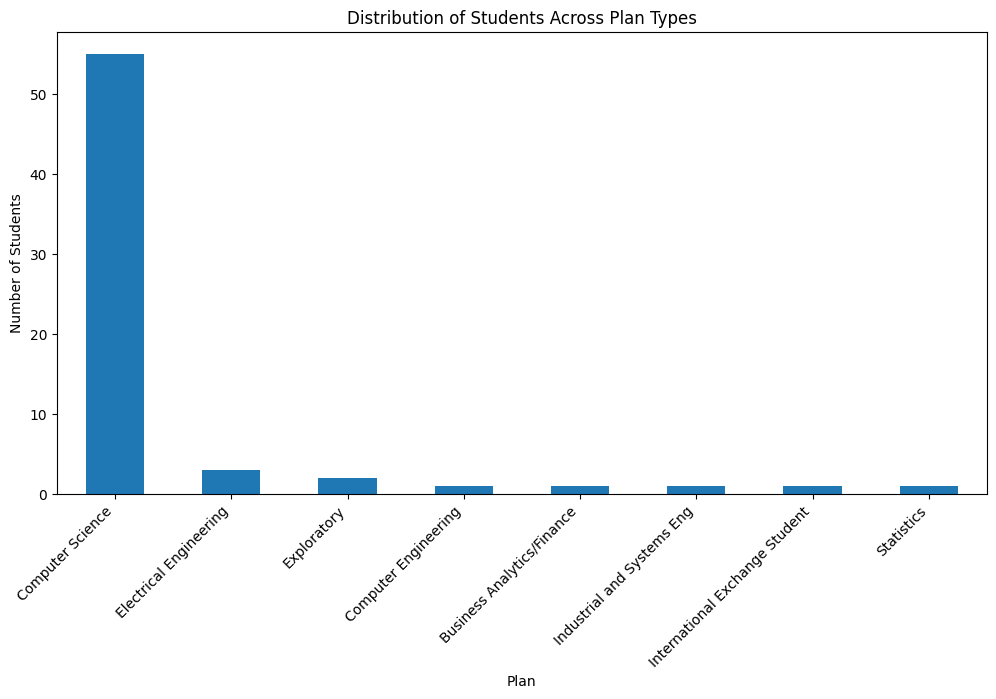

In [4]:
# Return a Series containing the frequency of each distinct row in the Dataframe.
plan_counts = df['Plan'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plan_counts.plot(kind='bar')

# Customize the plot
plt.title('Distribution of Students Across Plan Types')
plt.xlabel('Plan')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Student enrollments by academic level

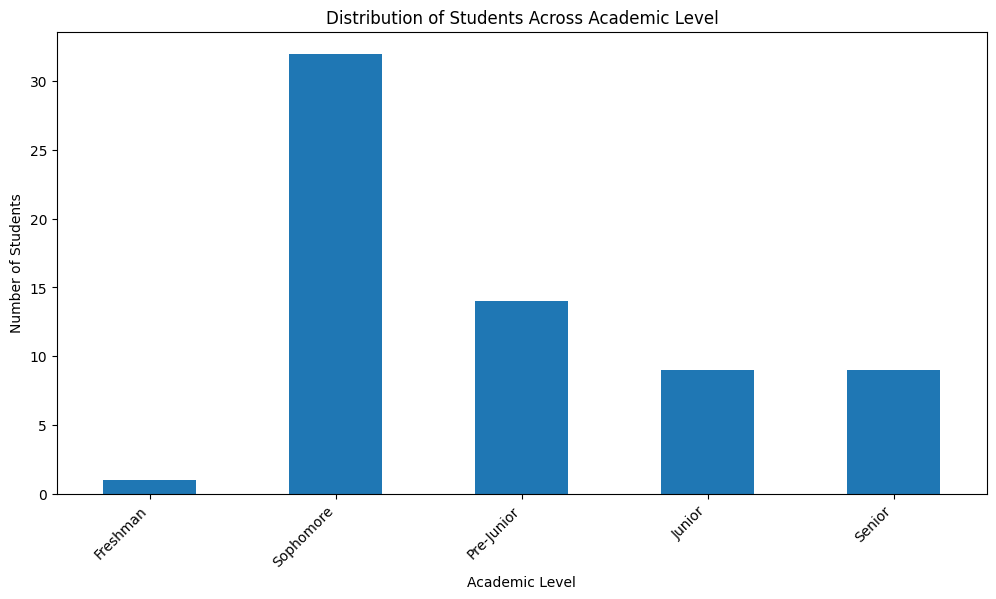

In [5]:
# Return a Series containing the frequency of each distinct row in the Dataframe.
academic_level_counts = df['Level'].value_counts()

# order by specific academic level
academic_level_order = ['Freshman', 'Sophomore', 'Pre-Junior', 'Junior', 'Senior']
academic_level_counts_ordered = academic_level_counts.reindex(academic_level_order)

# Create a bar plot
plt.figure(figsize=(12, 6))
academic_level_counts_ordered.plot(kind='bar')

# Customize the plot
plt.title('Distribution of Students Across Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()